## Import

In [1]:
import pandas as pd
import numpy as np

# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.losses import categorical_crossentropy, mean_squared_error
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error, \
                                f1_score, auc, r2_score
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

## Data

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
kf = KFold(n_splits=2, shuffle=True)

for train_idx, test_idx in kf.split(X):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

## MLP Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [4]:
mlpc = MLPClassifier()

In [5]:
mlpc.fit(X_train, y_train)

/home/can/anaconda3/envs/tfgpu/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [6]:
# return mean acc
mlpc.score(X_test, y_test)

0.96

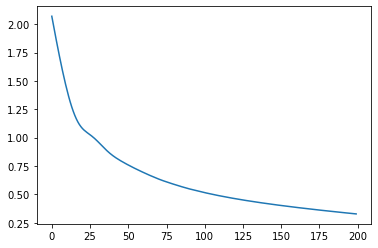

In [7]:
plt.plot(mlpc.loss_curve_)

## MLP Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [8]:
mlpr = MLPRegressor()

mlpr.fit(X_train, y_train)

In [9]:
mlpr.fit(X_train, y_train)

MLPRegressor()

In [10]:
# return R^2 error
mlpr.score(X_test, y_test)

0.9079134466078584

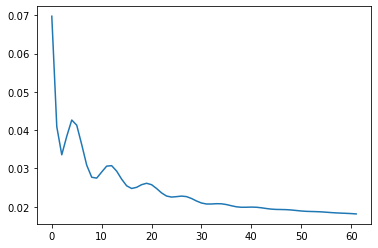

In [11]:
plt.plot(mlpr.loss_curve_)

In [12]:
# accuracy with rounded predictions
accuracy_score(y_test, 
               np.round(mlpr.predict(X_test)))

0.9333333333333333

## Compare regression and classification predictions

In [13]:
print("MLP Classifier \t MLP Regressor")
print("=========== \t ===========")
for i in range(len(y_test)):
    print(mlpc.predict(X_test)[i], "<------------->", mlpr.predict(X_test)[i])

MLP Classifier 	 MLP Regressor
=========== 	 ===========
0 <-------------> -0.04382555354438364
0 <-------------> -0.01554730878140416
0 <-------------> -0.022496530801133216
0 <-------------> 0.03970883204541793
0 <-------------> -0.028828747910311148
0 <-------------> -0.04927772771252062
0 <-------------> -0.11298979928046421
0 <-------------> -0.11601353531619435
0 <-------------> -0.06533079477337167
0 <-------------> 0.14763424856532154
0 <-------------> -0.0037458553486450774
0 <-------------> 0.09208844552050434
0 <-------------> 0.06392293795311359
0 <-------------> 0.045241542001313764
0 <-------------> -0.18898214353519976
0 <-------------> 0.04520410066192093
0 <-------------> 0.005865344106141909
0 <-------------> -0.03589189716672242
0 <-------------> 0.11533980436522644
0 <-------------> -0.09199841946116369
0 <-------------> -0.006661975684164392
1 <-------------> 1.2438425882182707
1 <-------------> 1.1943872544232839
1 <-------------> 1.2837746011580717
1 <-----------